<h1>Task 20->Feature Engineering</h1>
<h1>Task1</h1>

In [8]:
# Step 1: Load the dataset
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h1>correlation</h1>

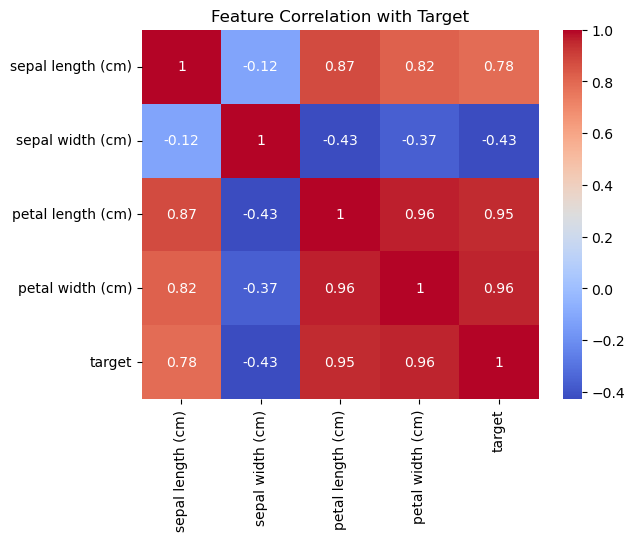

In [11]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Target")
plt.show()

<h1>Feature Selection Using Chi-Squared Test and Mutual Information</h1>

In [18]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

X = df.drop('target', axis=1)
y = df['target']
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X, y)
chi2_scores = chi2_selector.scores_
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(X, y)
mi_scores = mi_selector.scores_
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'Mutual Info': mi_scores
})
print(feature_scores.sort_values(by='Mutual Info', ascending=False))


             Feature  Chi2 Score  Mutual Info
3   petal width (cm)   67.048360     0.993760
2  petal length (cm)  116.312613     0.985176
0  sepal length (cm)   10.817821     0.506656
1   sepal width (cm)    3.710728     0.222516


<h1>Task2</h1>
<h1>Load dataset</h1>

In [22]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h1>Apply Transformations</h1>

In [ ]:
import numpy as np

log_df = df.copy()
log_df[iris.feature_names] = np.log1p(log_df[iris.feature_names])
log_df.head()


<h1>normalization</h1>

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_df = df.copy()
normalized_df[iris.feature_names] = scaler.fit_transform(df[iris.feature_names])
normalized_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


<h1>standardization</h1>

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_df = df.copy()
standardized_df[iris.feature_names] = scaler.fit_transform(df[iris.feature_names])
standardized_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


<h1>
Transformation	Description	When to Use
Log	Reduces skewness and outliers	Skewed data
Normalization	Scales to 0–1	Algorithms like KNN, neural nets
Standardization	Scales with mean=0, std=1	Algorithms like SVM, logistic regression</h1>

<h1>feature creation</h1>
<h1>Create new features from existing data.</h1>

In [45]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
df['petal_sepal_length_ratio'] = df['petal length (cm)'] / df['sepal length (cm)']

In [49]:
df['total_length'] = df['petal length (cm)'] + df['sepal length (cm)']

In [51]:
df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']


In [55]:
df[['petal_sepal_length_ratio', 'total_length', 'petal_area']].head()


,petal_sepal_length_ratio,total_length,petal_area
0,0.274510,6.5,0.28
1,0.285714,6.3,0.28
2,0.276596,6.0,0.26
3,0.326087,6.1,0.30
4,0.280000,6.4,0.28


<h1>New Feature | Description | Why It Might Help
petal_sepal_length_ratio | Relative comparison of petal to sepal length | May help distinguish between species
total_length | Sum of petal and sepal length | Captures total flower size
petal_area | Approximated area of petal | Useful for separating species with large petals</h1>

<h1> Task 4: Polynomial Features</h1>

In [70]:
# Task 4: Polynomial Features

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Target'] = housing.target  # Target variable
print("Original Data:")
df.head()



Original Data:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [72]:
features = df[['MedInc', 'AveRooms']]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(features)
poly_feature_names = poly.get_feature_names_out(['MedInc', 'AveRooms'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
final_df = pd.concat([poly_df, df['Target']], axis=1)
print("\nData with Polynomial Features:")
final_df.head()


Data with Polynomial Features:


,MedInc,AveRooms,MedInc^2,MedInc AveRooms,AveRooms^2,Target
0,8.3252,6.984127,69.308955,58.144254,48.778030,4.526
1,8.3014,6.238137,68.913242,51.785271,38.914354,3.585
2,7.2574,8.288136,52.669855,60.150315,68.693192,3.521
3,5.6431,5.817352,31.844578,32.827897,33.841580,3.413
4,3.8462,6.281853,14.793254,24.161264,39.461681,3.422


<h1>Handling Categorical Features</h1>

In [77]:
# Task 5: Handling Categorical Features

import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
titanic = sns.load_dataset('titanic')
print("Original Titanic Data:")
titanic[['sex', 'embarked', 'class', 'who', 'survived']].head()



Original Titanic Data:


,sex,embarked,class,who,survived
0,male,S,Third,man,0
1,female,C,First,woman,1
2,female,S,Third,woman,1
3,female,S,First,woman,1
4,male,S,Third,man,0


In [79]:
titanic = titanic.dropna(subset=['embarked', 'sex', 'class'])
label_encoder = LabelEncoder()
titanic['sex_encoded'] = label_encoder.fit_transform(titanic['sex'])
titanic_encoded = pd.get_dummies(titanic, columns=['embarked', 'class'], drop_first=True)
print("\nEncoded Titanic Data (sample):")
titanic_encoded[['sex', 'sex_encoded', 'embarked_Q', 'embarked_S', 'class_Second', 'class_Third']].head()


Encoded Titanic Data (sample):


,sex,sex_encoded,embarked_Q,embarked_S,class_Second,class_Third
0,male,1,False,True,False,True
1,female,0,False,False,False,False
2,female,0,False,True,False,True
3,female,0,False,True,False,False
4,male,1,False,True,False,True
